In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
bean_df = pd.read_csv('./Dry_Bean_Dataset.csv')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
print(f'shape of the datset: {bean_df.shape}')
print(f'Features:\n {bean_df.nunique()}')

shape of the datset: (13611, 17)
Features:
 Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64


In [6]:
train, val, test = np.split(bean_df.sample(frac=1), [int(0.8*len(bean_df)), int(0.9*len(bean_df))])
val

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
6062,49949,878.258,357.200948,178.766749,1.998140,0.865756,50449,252.184540,0.618502,0.990089,0.813753,0.706002,0.007151,0.001096,0.498439,0.995950,HOROZ
1530,42745,756.589,252.422343,215.933100,1.168984,0.517896,43206,233.290858,0.798450,0.989330,0.938372,0.924208,0.005905,0.002658,0.854161,0.998501,SEKER
6098,50362,898.204,360.980706,178.650041,2.020602,0.868949,51020,253.224979,0.747299,0.987103,0.784446,0.701492,0.007168,0.001071,0.492091,0.994320,HOROZ
9580,48910,846.382,323.690731,193.684338,1.671228,0.801226,49661,249.547883,0.678853,0.984877,0.857975,0.770945,0.006618,0.001442,0.594357,0.993306,SIRA
13534,41255,744.090,273.735133,192.350377,1.423107,0.711498,41579,229.188781,0.735423,0.992208,0.936344,0.837265,0.006635,0.002011,0.701012,0.997615,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10930,28446,631.047,240.324464,151.379705,1.587561,0.776679,28754,190.311776,0.766119,0.989288,0.897651,0.791895,0.008448,0.002049,0.627098,0.995556,DERMASON
2330,62363,950.295,360.506342,220.634377,1.633954,0.790848,63010,281.785446,0.690528,0.989732,0.867801,0.781638,0.005781,0.001331,0.610958,0.998277,BARBUNYA
11530,30768,647.162,236.554557,165.882122,1.426040,0.712923,31137,197.926841,0.709561,0.988149,0.923173,0.836707,0.007688,0.002324,0.700079,0.998340,DERMASON
3846,215107,1772.436,680.489210,406.940292,1.672209,0.801488,217799,523.338073,0.819143,0.987640,0.860445,0.769062,0.003163,0.000683,0.591456,0.989037,BOMBAY


In [12]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('Class')
  labels = pd.get_dummies(labels)
  df = {key: value.values[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [13]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val)
test_ds = df_to_dataset(test)

In [14]:
def get_normalization_layer(name, dataset):
  normalizer = tf.keras.layers.Normalization(axis=None)
  feature_ds = dataset.map(lambda x, y: x[name])
  normalizer.adapt(feature_ds)
  return normalizer

In [15]:
all_inputs, encoded_features, cols = [], [], []
for i in bean_df.columns:
    cols.append(i)
cols.remove('Class')
for header in cols:
  col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_col = normalization_layer(col)
  all_inputs.append(col)
  encoded_features.append(encoded_col)

In [20]:
num_classes = 7
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
x = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
model = tf.keras.Model(all_inputs,outputs)
model.compile(optimizer=Adam, loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [21]:
history = model.fit(train_ds,validation_data=val_ds,epochs=100)

Epoch 1/100


c:\Users\keert\anaconda3\lib\site-packages\keras\engine\functional.py:631: UserWarning: Input dict contained keys ['Class'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


341/341 [==============================] - 2s 3ms/step - loss: 0.7196 - accuracy: 0.7305 - val_loss: 0.3066 - val_accuracy: 0.9104
Epoch 2/100
341/341 [==============================] - 1s 2ms/step - loss: 0.2515 - accuracy: 0.9115 - val_loss: 0.2466 - val_accuracy: 0.9302
Epoch 3/100
341/341 [==============================] - 1s 2ms/step - loss: 0.2216 - accuracy: 0.9221 - val_loss: 0.2180 - val_accuracy: 0.9353
Epoch 4/100
341/341 [==============================] - 1s 2ms/step - loss: 0.2108 - accuracy: 0.9239 - val_loss: 0.2126 - val_accuracy: 0.9339
Epoch 5/100
341/341 [==============================] - 1s 2ms/step - loss: 0.2057 - accuracy: 0.9255 - val_loss: 0.2122 - val_accuracy: 0.9309
Epoch 6/100
341/341 [==============================] - 1s 2ms/step - loss: 0.2001 - accuracy: 0.9274 - val_loss: 0.2131 - val_accuracy: 0.9317
Epoch 7/100
341/341 [==============================] - 1s 2ms/step - loss: 0.1985 - accuracy: 0.9253 - val_loss: 0.2072 - val_accuracy: 0.9309
Epoch 8/100

In [22]:
import matplotlib.pyplot as plt
history = history.history

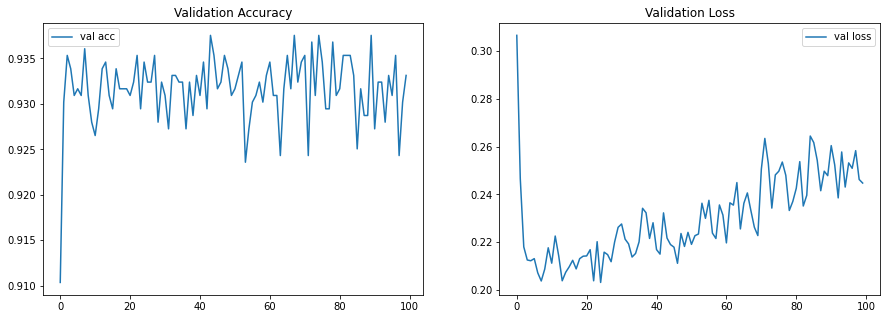

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Validation Accuracy")
plt.plot(history["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Validation Loss")
plt.plot(history["val_loss"],label="val loss")
plt.legend()

plt.show()